# ORIE 5530 Project: NYC Citibike

First, clean the data by eliminating the rides that last more than 3 hours (if any). These are
likely bikes that were left undocked. Also eliminate the rides with negative ride time (if any). These
are likely corresponding to some docking/undocking problems.

### Part 1
- Compute the duration of each ride in minutes
- Plot the histogram of ride durations

In [1]:
import numpy as np

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file1 = r"C:\Users\risha\Cornell University\Modeling Under Uncertainty\Final Project\citibike-tripdata\202407-citibike-tripdata_1.csv"
file2 = r"C:\Users\risha\Cornell University\Modeling Under Uncertainty\Final Project\citibike-tripdata\202407-citibike-tripdata_2.csv"
file3 = r"C:\Users\risha\Cornell University\Modeling Under Uncertainty\Final Project\citibike-tripdata\202407-citibike-tripdata_3.csv"
file4 = r"C:\Users\risha\Cornell University\Modeling Under Uncertainty\Final Project\citibike-tripdata\202407-citibike-tripdata_4.csv"
file5 = r"C:\Users\risha\Cornell University\Modeling Under Uncertainty\Final Project\citibike-tripdata\202407-citibike-tripdata_5.csv"

files = [file1, file2, file3, file4, file5]

In [3]:
citiBike = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)

C:\Users\risha\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.
C:\Users\risha\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


In [4]:
citiBike.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0,A3818B07E831C033,electric_bike,2024-07-01 21:00:55.640,2024-07-01 21:07:43.553,W 24 St & 7 Ave,6257.03,W 20 St & 10 Ave,6306.01,40.744784,-73.995524,40.745686,-74.005141,member
1,1,40B46D3F898A6CA4,electric_bike,2024-07-09 18:28:39.551,2024-07-09 18:46:43.854,Park Pl & Buffalo Ave,3999.06,Irving Ave & Harman St,4856.05,40.671992,-73.925502,40.701080,-73.917900,member
2,2,33683B345D08C2BC,electric_bike,2024-07-14 17:10:28.899,2024-07-14 17:27:59.917,E 48 St & 5 Ave,6626.01,E 43 St & Madison Ave,6551.11,40.757246,-73.978059,40.753547,-73.978966,casual
3,3,B213C077CE572EBD,electric_bike,2024-07-01 11:37:06.440,2024-07-01 11:42:02.259,Melrose Ave & E 154 St,7918.12,Wales Ave & E 147 St,7751.05,40.819665,-73.916111,40.811314,-73.907729,member
4,4,E42FF50D966A009B,electric_bike,2024-07-05 16:55:59.093,2024-07-05 16:59:41.250,W 24 St & 7 Ave,6257.03,Greenwich Ave & Charles St,5914.08,40.744817,-73.995416,40.735238,-74.000271,member


In [5]:
#Convert start and end times to datetime
citiBike['started_at'] = pd.to_datetime(citiBike['started_at'])
citiBike['ended_at'] = pd.to_datetime(citiBike['ended_at'])

#Calculate ride duration in minutes
citiBike['ride_duration'] = (citiBike['ended_at'] - citiBike['started_at']).dt.total_seconds() / 60

#Remove rides over 3 hours and any negative ride times
citiBike2 = citiBike[(citiBike['ride_duration'] <= 180) & (citiBike['ride_duration'] >= 0)]

print(citiBike.shape, citiBike2.shape)

(4722896, 15) (4713051, 15)


In [6]:
citiBike2['ride_duration'].max()

180.0

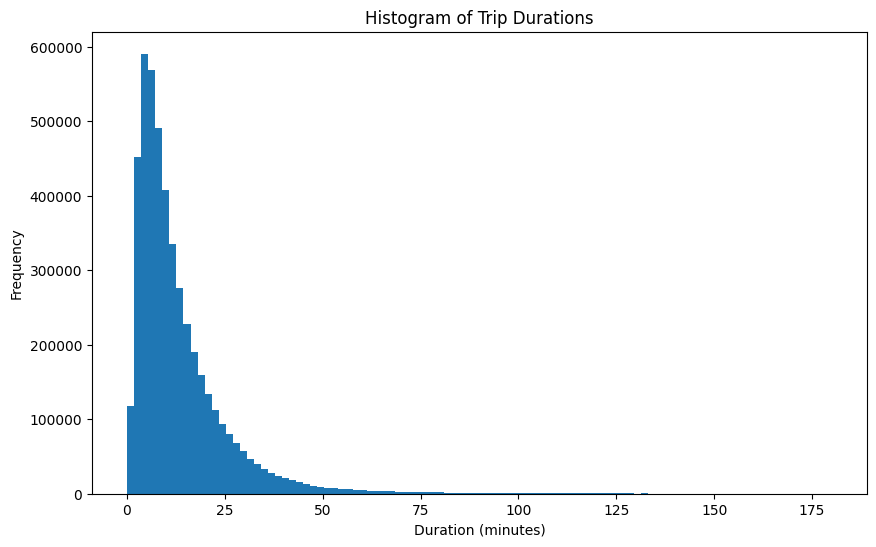

In [7]:
# Plot histogram of the duration in seconds
plt.figure(figsize=(10, 6))
plt.hist(citiBike2['ride_duration'], bins=100)  # Specify the column for the histogram
plt.title('Histogram of Trip Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

### Part 2 
- Find the expected ride duration
- Find the empirical variance of ride duration
- Find the probability that a ride duration is greater than 20 min
    - Let X be a RV of ride duration
    - Let p(x) be the probability that X > 20

In [8]:
mean = citiBike2['ride_duration'].mean()
variance = citiBike2['ride_duration'].var()
px = citiBike2[citiBike2['ride_duration'] > 20].shape[0] / citiBike2.shape[0]

print('Expected Ride Duration:', round(mean, 2))
print('Empirical Variance:', round(variance, 2))
print('Probability a Ride is Greater than 20 Minutes:', round(px, 2))

Expected Ride Duration: 13.42
Empirical Variance: 172.15
Probability a Ride is Greater than 20 Minutes: 0.19


### Part 3
- Find P(X > 20 | CitiBike member)
    - Let px_memeber be the probability of X > 20 minutes and a member
    - Let p_member be the probability of a member
    - Let p3 be final probability

In [9]:
px_member = ((citiBike2['ride_duration'] > 20) & (citiBike2['member_casual'] == 'member')).mean()
p_member = (citiBike2['member_casual'] == 'member').mean()
p3 = px_member / p_member

print(f"Probability of Ride Duration > 20 minutes given the user is a CitiBike member: {round(p3,2)}")

Probability of Ride Duration > 20 minutes given the user is a CitiBike member: 0.15


### Part 4
- Find P(CitiBike Member | X > 25 minutes)
    - Lets call this p4
    - Let px_25 be P(X>25 minutes)
    - Let px_member be P(X>25 minutes & CitiBike Member)

In [10]:
px_member = ((citiBike2['member_casual'] == 'member') & (citiBike2['ride_duration'] > 25)).mean()
px_25 = (citiBike2['ride_duration'] > 25).mean()
p4 = px_member / px_25

print(f"Probability that the ride belongs to a CitiBike member given the ride duration > 25 minutes: {round(p4, 2)}")

Probability that the ride belongs to a CitiBike member given the ride duration > 25 minutes: 0.57


### Part 5
- Find the expected ride duration of an electric bike
- Find the expected ride duration of a classic bike

In [11]:
expected_electric = citiBike2[citiBike2['rideable_type'] == 'electric_bike']['ride_duration'].mean()
expected_classic = citiBike2[citiBike2['rideable_type'] == 'classic_bike']['ride_duration'].mean()

print(f"Expected Ride Duration (Electric Bike): {expected_electric.round(2)} minutes")
print(f"Expected Ride Duration (Classic Bike): {expected_classic.round(2)} minutes")

Expected Ride Duration (Electric Bike): 13.78 minutes
Expected Ride Duration (Classic Bike): 12.74 minutes


### Part 6
- Find P(Electric Bike | X < 10 minutes)
    - Lets call this p6_electric
- Find P(Classic Bike | X < 10 minutes)
    - Lets call this p6_classic

Note the following notations
 - px_10 = Probability ride duration is less than 10 minutes
 - px_10_electric = Probability ride duration is less than 10 minutes and Electric Bike
 - px_10_classic = Probability ride duration is less than 10 minutes and Classic Bike

In [12]:
px_10 = (citiBike2['ride_duration'] < 10).mean()
px_10_electric = ((citiBike2['rideable_type'] == 'electric_bike') & (citiBike2['ride_duration'] < 10)).mean()
px_10_classic = ((citiBike2['rideable_type'] == 'classic_bike') & (citiBike2['ride_duration'] < 10)).mean()

# Conditional probabilities
p6_electric = px_10_electric / px_10
p6_classic = px_10_classic / px_10


# Print the results
print(f"Probability that the bike is electric given ride duration < 10 minutes: {p6_electric.round(2)}")
print(f"Probability that the bike is classic given ride duration < 10 minutes: {p6_classic.round(2)}")


Probability that the bike is electric given ride duration < 10 minutes: 0.63
Probability that the bike is classic given ride duration < 10 minutes: 0.37


The results indicate that for rides with a duration of less than 10 minutes, there is a 63% probability that the bike is electric and 37% chance that the bike is classic. There could be a few reasons for the large difference in probabilities. 

1) Electric bikes may be more popular for shorter rides. The elctric bikes might be more for the intent of commuting to a place quickly and efficienty. The extra speed would allow users to reach a destination faster who have limited time. On the contrary, the classic bike may be used for leisure purposes. Thus, riders may tend to take the classic bike to enjoy a longer ride.


2) Since the electric bikes are faster, riders may just be getting to destinations at a faster pace then classic bikers. 


3) The pricing of the bikes may play a role as well. The elctric bikes are more expensive, incentivizing users to use them for shorter trips. 

## Project

### Filter out Weekdays

In [13]:
citiBike2['weekday'] = citiBike2['started_at'].dt.weekday
citiBike2.head(3)

C:\Users\risha\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,weekday
0,0,A3818B07E831C033,electric_bike,2024-07-01 21:00:55.640,2024-07-01 21:07:43.553,W 24 St & 7 Ave,6257.03,W 20 St & 10 Ave,6306.01,40.744784,-73.995524,40.745686,-74.005141,member,6.798550,0
1,1,40B46D3F898A6CA4,electric_bike,2024-07-09 18:28:39.551,2024-07-09 18:46:43.854,Park Pl & Buffalo Ave,3999.06,Irving Ave & Harman St,4856.05,40.671992,-73.925502,40.701080,-73.917900,member,18.071717,1
2,2,33683B345D08C2BC,electric_bike,2024-07-14 17:10:28.899,2024-07-14 17:27:59.917,E 48 St & 5 Ave,6626.01,E 43 St & Madison Ave,6551.11,40.757246,-73.978059,40.753547,-73.978966,casual,17.516967,6


In [14]:
citiBike3 = citiBike2[citiBike2['weekday'] < 5]
citiBike3 = citiBike3.dropna() #drop null values
citiBike3.shape

(3552462, 16)

### Select Three Popular Stations

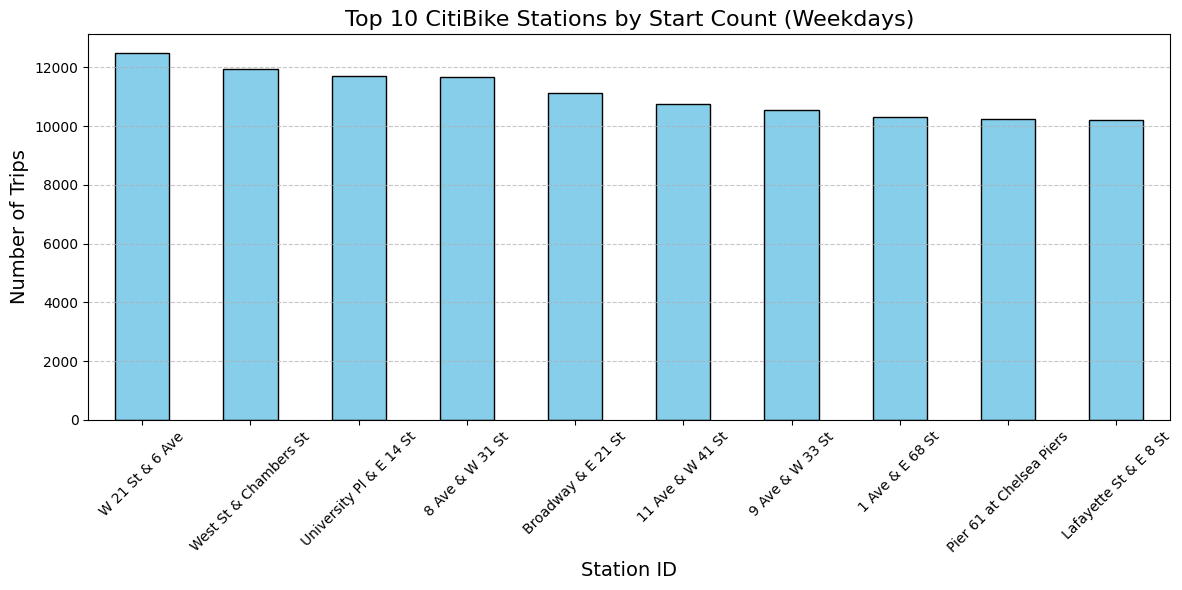

In [15]:
# Count trips starting at each station
station_counts = citiBike3['start_station_name'].value_counts()

# Plot a histogram of the top 10 stations
plt.figure(figsize=(12, 6))
station_counts.head(10).plot(kind='bar', color='skyblue', edgecolor='k')
plt.title('Top 10 CitiBike Stations by Start Count (Weekdays)', fontsize=16)
plt.xlabel('Station ID', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

The following stations were chosen based on trip cound and geographical location:
1) W 21 St & 6 Ave
2) West St & Chmaber St
3) 1 Ave & E 68th

### Filter Dataset for Selected Station

In [16]:
stations = ["W 21 St & 6 Ave", "West St & Chambers St", "1 Ave & E 68 St"]

# Filter for trips involving the selected stations
citiBike4 = citiBike3[
    (citiBike3['start_station_name'].isin(stations)) |
    (citiBike3['end_station_name'].isin(stations))
]


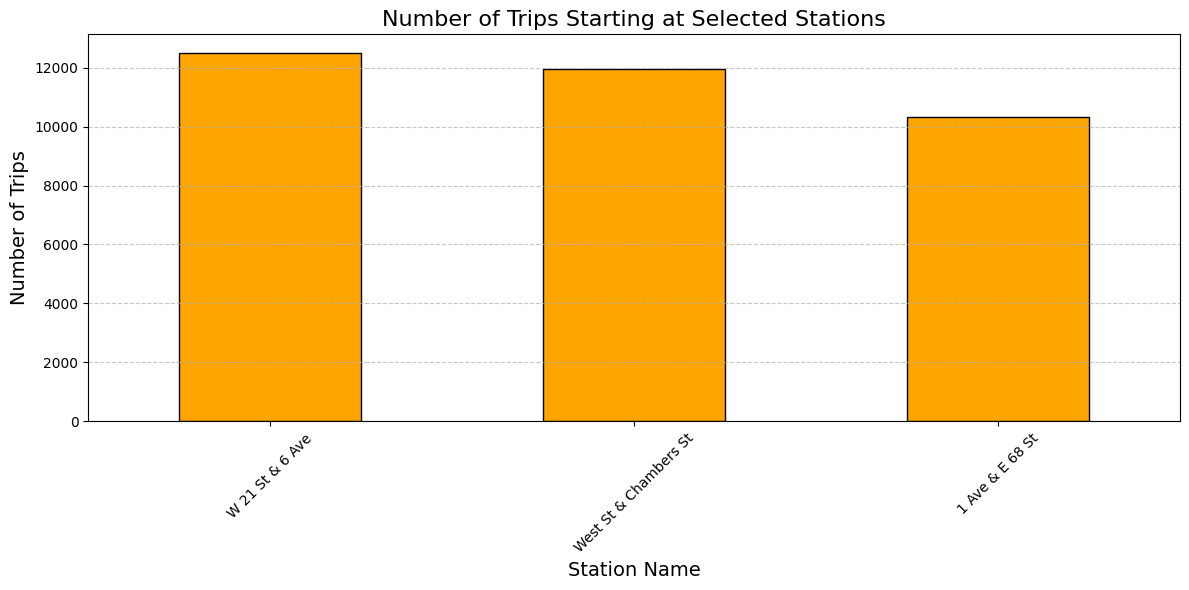

In [17]:
start_station_counts = citiBike4['start_station_name'].value_counts()

# Filter counts for the selected stations
filtered_start_counts = start_station_counts.loc[start_station_counts.index.isin(stations)]

# Plot a histogram for the selected stations
plt.figure(figsize=(12, 6))
filtered_start_counts.plot(kind='bar', color='orange', edgecolor='k')
plt.title('Number of Trips Starting at Selected Stations', fontsize=16)
plt.xlabel('Station Name', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### Filter  Morning and Evening Blocks
1) Morning: 6:00am to Noon
2) Evening: 4:00pm to 10:00pm

In [18]:
morning_start = pd.Timestamp("06:00:00").time()
morning_end = pd.Timestamp("12:00:00").time()

evening_start = pd.Timestamp("16:00:00").time()
evening_end = pd.Timestamp("22:00:00").time()

citiBike_morning = citiBike4[
    (citiBike4['started_at'].dt.time >= morning_start) &
    (citiBike4['started_at'].dt.time < morning_end)
]

citiBike_evening = citiBike4[
    (citiBike4['started_at'].dt.time >= evening_start) &
    (citiBike4['started_at'].dt.time < evening_end)
]

print(f"Number of trips in the morning block: {len(citiBike_morning)}")
print(f"Number of trips in the evening block: {len(citiBike_evening)}")

Number of trips in the morning block: 21222
Number of trips in the evening block: 30733


### Discretize Blocks in Periods of 10 minutes

#### Create time bins

The time bins represent the 10 minute period blocks. For example, a trip starting at 6:49am would belong in time bin 6:40am

In [19]:
# Combine discretizing and binning directly
def assign_bins(data, start_hour, interval_minutes):
    data['bin_number'] = (
        (data['started_at'].dt.hour - start_hour) * 60 + data['started_at'].dt.minute
    ) // interval_minutes
    return data

# Assign bins for morning and evening
citiBike_morning = assign_bins(citiBike_morning, start_hour=6, interval_minutes=10)
citiBike_evening = assign_bins(citiBike_evening, start_hour=16, interval_minutes=10)


C:\Users\risha\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [20]:
print(citiBike_morning[['started_at', 'bin_number']].head())
print(citiBike_evening[['started_at', 'bin_number']].head())


                  started_at  bin_number
573  2024-07-12 06:49:01.405           4
835  2024-07-11 08:38:19.850          15
991  2024-07-10 06:17:48.155           1
1369 2024-07-11 10:01:54.475          24
1574 2024-07-10 08:07:44.175          12
                 started_at  bin_number
113 2024-07-08 18:32:49.273          15
468 2024-07-03 19:14:03.930          19
472 2024-07-02 20:14:37.893          25
480 2024-07-11 19:05:04.249          18
536 2024-07-12 16:42:46.291           4


In [21]:
print("Morning Bins:", sorted(citiBike_morning['bin_number'].unique()))
print("Evening Bins:", sorted(citiBike_evening['bin_number'].unique()))

Morning Bins: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
Evening Bins: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


### Create Station-Specific DataFrames

We will split the morning and evening data into seperate DataFrames for each station. This ensures each station's data is isolate, allowing us to compute the transition matrix without confusion.

In [22]:
def filter_station_data(df, station_name):
    return df[
        (df['start_station_name'] == station_name) |
        (df['end_station_name'] == station_name)
    ]

In [23]:
# Redefine stations
stations = ["W 21 St & 6 Ave", "West St & Chambers St", "1 Ave & E 68 St"]

# Create dictionaries to store station-specific DataFrames
morning_stations = {}
evening_stations = {}

# Loop through stations and filter data
for station in stations:
    morning_stations[station] = filter_station_data(citiBike_morning, station)
    evening_stations[station] = filter_station_data(citiBike_evening, station)


In [24]:
morning_stations["1 Ave & E 68 St"]

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,weekday,bin_number
6387,6387,301A4D7A625A09F8,electric_bike,2024-07-01 08:47:46.274,2024-07-01 09:00:31.880,1 Ave & E 68 St,6822.09,6 Ave & W 34 St,6364.10,40.765055,-73.957948,40.749640,-73.988050,member,12.760100,0,16
10905,10905,57F38D4D8E8F0676,electric_bike,2024-07-12 08:41:30.184,2024-07-12 08:54:43.550,1 Ave & E 68 St,6822.09,3 Ave & E 100 St,7414.17,40.765115,-73.958145,40.787721,-73.947283,member,13.222767,4,16
13441,13441,24446674314BA237,classic_bike,2024-07-02 10:51:53.685,2024-07-02 10:57:29.911,1 Ave & E 68 St,6822.09,E 63 St & 3 Ave,6830.02,40.765005,-73.958185,40.763954,-73.964600,member,5.603767,1,29
15457,15457,AF79A496AEB991ED,classic_bike,2024-07-02 09:11:11.862,2024-07-02 09:36:08.744,W 41 St & 8 Ave,6602.03,1 Ave & E 68 St,6822.09,40.756405,-73.990026,40.765005,-73.958185,member,24.948033,1,19
15472,15472,2C3936A18BB800AC,electric_bike,2024-07-11 07:29:38.199,2024-07-11 07:30:49.621,E 68 St & 3 Ave,6896.16,1 Ave & E 68 St,6822.09,40.766992,-73.962267,40.765005,-73.958185,member,1.190367,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720920,4720920,892BCAEEF48D59C4,electric_bike,2024-07-25 07:08:44.860,2024-07-25 07:11:44.719,1 Ave & E 68 St,6822.09,E 63 St & 3 Ave,6830.02,40.765005,-73.958185,40.763954,-73.964600,member,2.997650,3,6
4720925,4720925,1E76EEB06D40AFFE,electric_bike,2024-07-30 08:01:19.988,2024-07-30 08:10:56.946,1 Ave & E 68 St,6822.09,W 56 St & 6 Ave,6809.07,40.765005,-73.958185,40.763406,-73.977225,member,9.615967,1,12
4720937,4720937,2D2457E93DDE6CD3,electric_bike,2024-07-19 10:29:49.034,2024-07-19 10:32:48.822,1 Ave & E 68 St,6822.09,E 63 St & 3 Ave,6830.02,40.765005,-73.958185,40.763954,-73.964600,member,2.996467,4,26
4721303,4721303,3BC557A939F76B96,electric_bike,2024-07-25 11:55:20.072,2024-07-25 11:59:07.509,1 Ave & E 68 St,6822.09,E 63 St & 3 Ave,6830.02,40.765005,-73.958185,40.763954,-73.964600,member,3.790617,3,35


In [25]:
# Display shapes of morning DataFrames
print("Morning Stations:")
for station, df in morning_stations.items():
    print(f"  {station}: {df.shape}")

# Display shapes of evening DataFrames
print("\nEvening Stations:")
for station, df in evening_stations.items():
    print(f"  {station}: {df.shape}")


Morning Stations:
  W 21 St & 6 Ave: (7556, 17)
  West St & Chambers St: (5520, 17)
  1 Ave & E 68 St: (8217, 17)

Evening Stations:
  W 21 St & 6 Ave: (10664, 17)
  West St & Chambers St: (12777, 17)
  1 Ave & E 68 St: (7360, 17)


### Calculate Inflow and Outflows in new DataFrame

Inflow: Count of bikes ending their rides at a station within a specific interval

Outflow: Count of bikes starting rides from a station within a specific interval

Net Change: The difference between inflow and outflow provides the change in the number of available bikes at the station for that interval

In [26]:
def calculate_inflows_outflows(data, station_name):
    inflows = data[data['end_station_name'] == station_name].groupby('bin_number').size()
    outflows = data[data['start_station_name'] == station_name].groupby('bin_number').size()
    inflow_outflow = pd.DataFrame({'inflow': inflows, 'outflow': outflows}).fillna(0).astype(int)
    
    # Fill in missing bins
    total_bins = data['bin_number'].max() + 1  # Maximum number of bins from the input data
    all_bins = pd.RangeIndex(start=0, stop=total_bins, step=1)  # Full range of bins
    inflow_outflow = inflow_outflow.reindex(all_bins, fill_value=0)  # Reindex and fill missing bins with 0
    
    # Add a 'bin_number' column (reset the index)
    inflow_outflow = inflow_outflow.reset_index()
    inflow_outflow.rename(columns={'index': 'bin_number'}, inplace=True)
    
    # Add the station name as a column
    inflow_outflow['station_name'] = station_name
    
    return inflow_outflow


In [27]:
# Calculate inflows and outflows for Morning and Evening blocks dynamically
morning_io = {}
evening_io = {}

for station in stations:
    morning_io[station] = calculate_inflows_outflows(morning_stations[station], station)
    evening_io[station] = calculate_inflows_outflows(evening_stations[station], station)

In [28]:
print("Morning Inflows and Outflows for W 21 St & 6 Ave:")
print(morning_io["W 21 St & 6 Ave"].shape)

print("\nEvening Inflows and Outflows for West St & Chambers St:")
print(evening_io["West St & Chambers St"].head())

Morning Inflows and Outflows for W 21 St & 6 Ave:
(36, 4)

Evening Inflows and Outflows for West St & Chambers St:
   bin_number  inflow  outflow           station_name
0           0     115      110  West St & Chambers St
1           1      98       78  West St & Chambers St
2           2     115       87  West St & Chambers St
3           3     125      145  West St & Chambers St
4           4     140      132  West St & Chambers St


### Compute Net Bike Availability for each station

Calculate the number of bikes available at each station over time by updating bike counts for each time bin using inflows and outflows.
 
We make sure the values stay within valid limits (0 to max capacity). This provides the bike availability state for each interval, which will be used in the transition matrix.

#### Maximum Capacity for Each Station
- **W 21 St & 6 Ave**: 70 docks
- **West St & Chambers St**: 111 docks
- **1 Ave & E 68 St**: 35 docks

The maximum capacities were looked up using Google Maps, which provides information on CitiBike docking stations.

In [31]:
# Define the maximum capacity for each station
station_capacities = {
    "W 21 St & 6 Ave": 70,
    "West St & Chambers St": 111,
    "1 Ave & E 68 St": 35
}

### Build the Transition Matrix

Create a transition probability matrix for each station, which shows the probability of transitioning between different bike availability states across time horizion

In [32]:
def build_transition_matrix(inflow_outflow, station_capacity):
    # Define the state space (0 to station_capacity)
    states = np.arange(station_capacity + 1)

    # Initialize the transition matrix with zeros
    transition_matrix = np.zeros((station_capacity + 1, station_capacity + 1))

    # Track the number of bikes available over time
    for i, row in inflow_outflow.iterrows():
        inflow = row['inflow']
        outflow = row['outflow']
        net_flow = inflow - outflow

        # Handle latent demand
        latent_demand_empty = max(0, -net_flow)  # Unmet demand when station is empty
        latent_demand_full = max(0, net_flow - station_capacity)  # Overflow when station is full

        # Update transition matrix based on net flow
        for count in range(station_capacity + 1):
            if count == 0 and latent_demand_empty > 0:
                # Station is empty, add latent demand to (0, 0)
                transition_matrix[0, 0] += latent_demand_empty
            elif count == station_capacity and latent_demand_full > 0:
                # Station is full, add latent demand to (n, n)
                transition_matrix[station_capacity, station_capacity] += latent_demand_full
            else:
                # Normal case: calculate new count
                new_count = min(max(count + net_flow, 0), station_capacity)
                transition_matrix[count, new_count] += 1

    # Normalize rows to get probabilities
    transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

    return transition_matrix


In [33]:
# Example: Build transition matrices for morning and evening blocks
morning_transition_matrices = {}
evening_transition_matrices = {}

for station, capacity in station_capacities.items():
    morning_transition_matrices[station] = build_transition_matrix(morning_io[station], capacity)
    evening_transition_matrices[station] = build_transition_matrix(evening_io[station], capacity)


In [46]:
# List of station names (replace with actual station names you have)
stations = ["W 21 St & 6 Ave", "West St & Chambers St", "1 Ave & E 68 St"]  

# Loop through each station and print its transition matrix
for station in stations:
    print(f"Evening Transition Matrix for {station}:")
    print(evening_transition_matrices[station])
    print()  # Add a blank line for better readability

Evening Transition Matrix for W 21 St & 6 Ave:
[[9.94418605e-01 1.86046512e-03 9.30232558e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.33333333e-01 0.00000000e+00 5.55555556e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.33333333e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [8.33333333e-02 0.00000000e+00 2.77777778e-02 ... 0.00000000e+00
  5.55555556e-02 1.11111111e-01]
 [8.33333333e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.66666667e-01]
 [8.33333333e-02 0.00000000e+00 0.00000000e+00 ... 2.77777778e-02
  0.00000000e+00 1.66666667e-01]]

Evening Transition Matrix for West St & Chambers St:
[[9.90723562e-01 9.27643785e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.22222222e-01 0.00000000e+00 2.77777778e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.22222222e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 .

In [45]:
# List of station names (replace with actual station names you have)
stations = ["W 21 St & 6 Ave", "West St & Chambers St", "1 Ave & E 68 St"]  

# Loop through each station and print its transition matrix
for station in stations:
    print(f"Morning Transition Matrix for {station}:")
    print(morning_transition_matrices[station])
    print()  # Add a blank line for better readability


Morning Transition Matrix for W 21 St & 6 Ave:
[[0.44642857 0.         0.01785714 ... 0.         0.         0.08928571]
 [0.13888889 0.         0.         ... 0.02777778 0.         0.13888889]
 [0.08333333 0.05555556 0.         ... 0.         0.02777778 0.13888889]
 ...
 [0.         0.         0.         ... 0.         0.         0.86111111]
 [0.         0.         0.         ... 0.05555556 0.         0.86111111]
 [0.         0.         0.         ... 0.         0.02666667 0.93333333]]

Morning Transition Matrix for West St & Chambers St:
[[0.70588235 0.01176471 0.         ... 0.         0.         0.        ]
 [0.25       0.05555556 0.02777778 ... 0.         0.         0.        ]
 [0.25       0.         0.05555556 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.05555556 0.02777778 0.66666667]
 [0.         0.         0.         ... 0.         0.05555556 0.69444444]
 [0.         0.         0.         ... 0.05555556 0.         0.75      ]]

Morning Tr

### Compute the Steady-State Distribution
Find the proportion of time each state (number of bikes available) will be observed over the long run

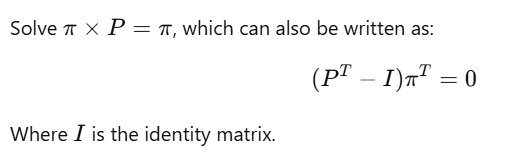

In [36]:
def steady_state(transition_matrix):
    eigvals, eigvecs = np.linalg.eig(transition_matrix.T)
    stationary = np.real(eigvecs[:, np.isclose(eigvals, 1)])
    stationary = stationary / stationary.sum()
    return stationary.flatten()


In [37]:
morning_steady_states = {}
evening_steady_states = {}

for station in station_capacities:
    morning_steady_states[station] = steady_state(morning_transition_matrices[station])
    evening_steady_states[station] = steady_state(evening_transition_matrices[station])


In [38]:
#Ensure the steady-state probabilities sum to 1

print("Morning Steady-State for W 21 St & 6 Ave:")
print(morning_steady_states["W 21 St & 6 Ave"])
print("Sum of probabilities:", morning_steady_states["W 21 St & 6 Ave"].sum())


Morning Steady-State for W 21 St & 6 Ave:
[8.79502439e-10 2.10191893e-10 3.47817233e-10 4.74829985e-10
 5.14914500e-10 5.03768560e-10 5.73848156e-10 8.81274812e-10
 1.34578469e-09 1.74498931e-09 2.36425121e-09 4.00325383e-09
 6.42926392e-09 7.97792592e-09 7.64766512e-09 6.77267010e-09
 8.76931817e-09 1.52430688e-08 2.22083208e-08 2.64497429e-08
 4.07820684e-08 8.00477032e-08 1.22361195e-07 1.27590416e-07
 9.93683360e-08 8.49067283e-08 1.41782314e-07 2.65874951e-07
 3.39482699e-07 3.75998994e-07 7.90911069e-07 1.70596700e-06
 2.22550152e-06 1.76834959e-06 1.07896472e-06 1.04424025e-06
 2.47899623e-06 4.48293179e-06 4.48490247e-06 5.23409033e-06
 1.80707173e-05 3.70251235e-05 3.57372783e-05 1.85464589e-05
 9.49149352e-06 1.35101371e-05 4.53044318e-05 6.72938064e-05
 4.36601949e-05 8.22572772e-05 4.74679579e-04 7.61603430e-04
 4.16087508e-04 1.06252248e-04 8.70541835e-05 1.64922113e-04
 8.19383677e-04 7.20796669e-04 2.00096698e-04 1.58099234e-03
 1.37690553e-02 1.24892294e-02 8.43707843e-

In [39]:
station_name = "W 21 St & 6 Ave"  # Example station
print("Transition Matrix Shape (should be capacity + 1):")
print(morning_transition_matrices[station_name].shape)

print("\nStation Capacity + 1 (Expected States):")
print(station_capacities[station_name] + 1)


Transition Matrix Shape (should be capacity + 1):
(71, 71)

Station Capacity + 1 (Expected States):
71


### Graphs Visualizaing Steady-States

In [40]:
import matplotlib.pyplot as plt
import numpy as np

def plot_steady_state_distributions(morning_steady_states, evening_steady_states, station_capacities):

    for station, capacity in station_capacities.items():
        # Morning and evening steady-state distributions
        morning_probs = morning_steady_states[station]
        evening_probs = evening_steady_states[station]
        
        # Define the states (0 to capacity)
        states = np.arange(capacity + 1)
        
        # Create subplots for morning and evening
        fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
        
        # Morning block
        axes[0].bar(states, morning_probs, alpha=0.7, color='blue')
        axes[0].set_title(f'{station} - Morning', fontsize=14)
        axes[0].set_xlabel('Number of Bikes Available', fontsize=12)
        axes[0].set_ylabel('Probability (Log Scale)', fontsize=12)
        axes[0].set_yscale('log')  # Set y-axis to logarithmic scale
        axes[0].grid(axis='y', linestyle='--', alpha=0.7)
        
        # Evening block
        axes[1].bar(states, evening_probs, alpha=0.7, color='green')
        axes[1].set_title(f'{station} - Evening', fontsize=14)
        axes[1].set_xlabel('Number of Bikes Available', fontsize=12)
        axes[1].set_yscale('log')  # Set y-axis to logarithmic scale
        axes[1].grid(axis='y', linestyle='--', alpha=0.7)
        
        # Overall title and layout adjustment
        fig.suptitle(f'Stationary Distributions for {station}', fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        
        # Show the plot
        plt.show()


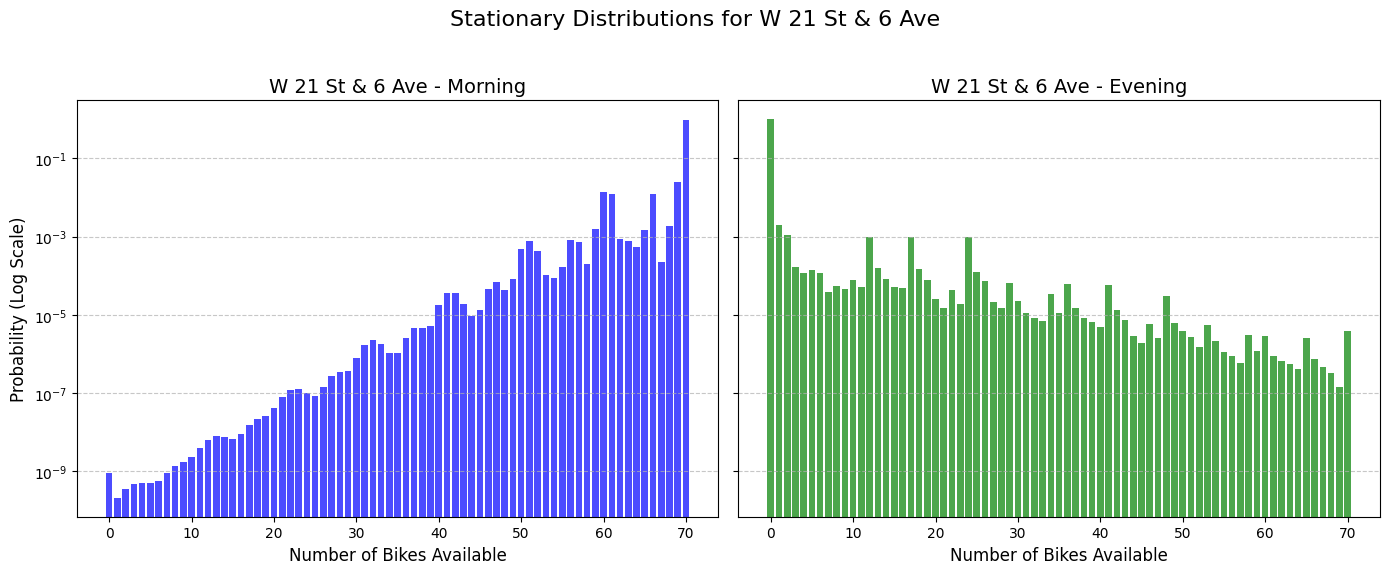

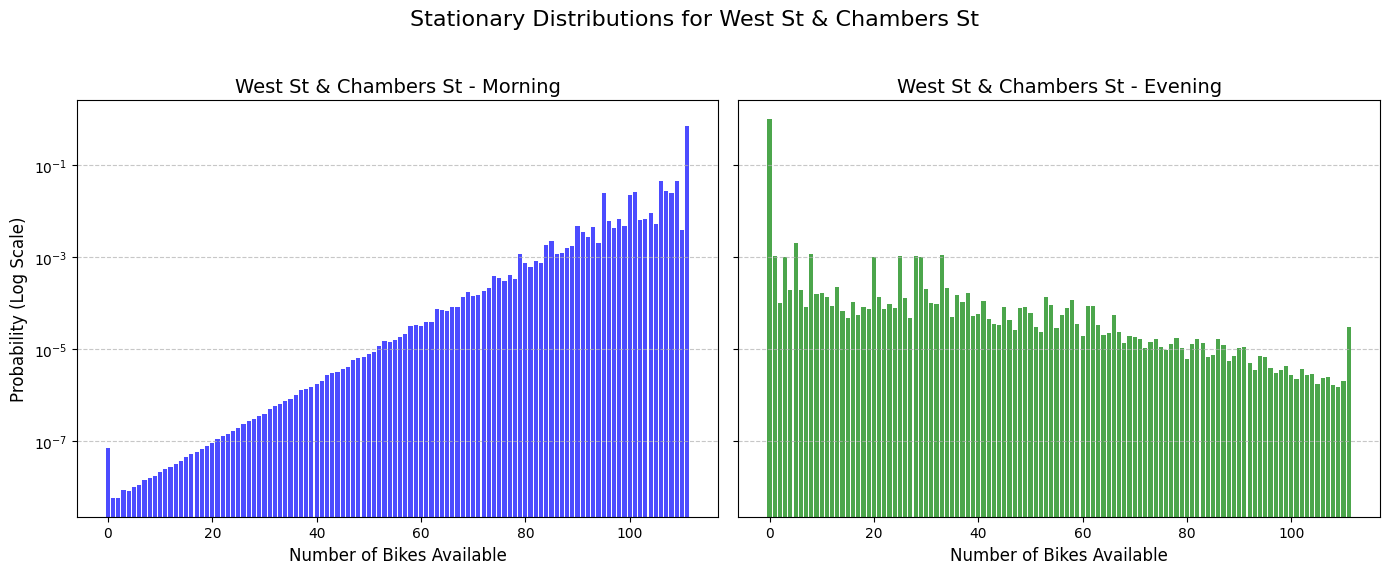

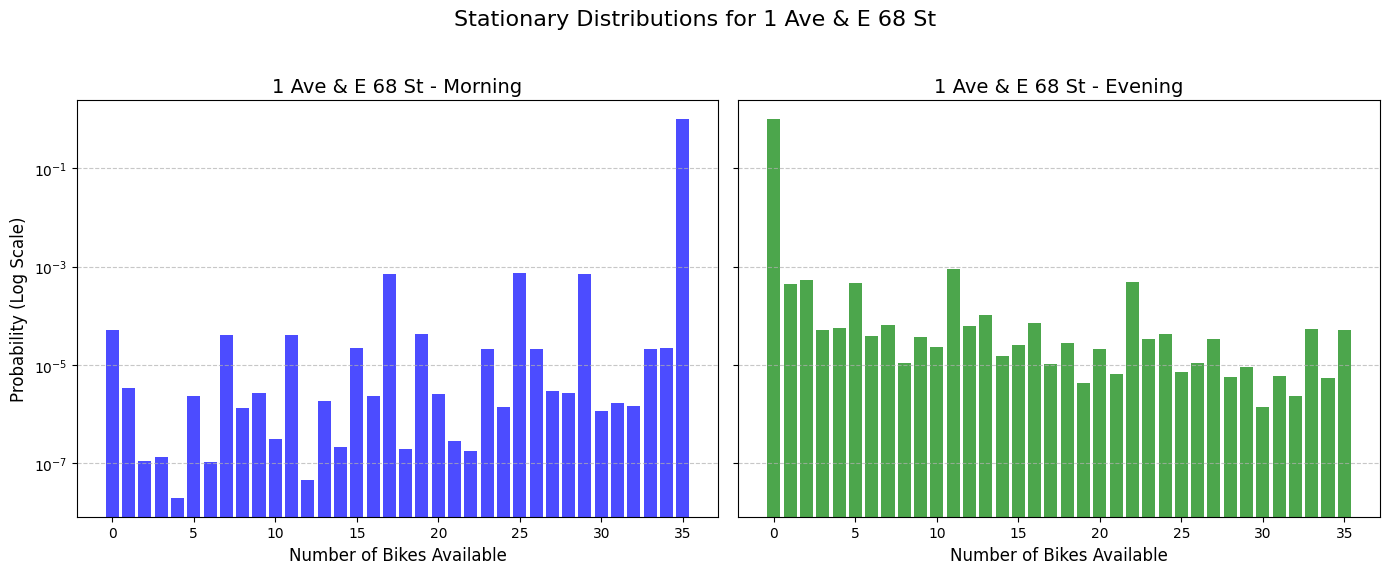

In [41]:
plot_steady_state_distributions(morning_steady_states, evening_steady_states, station_capacities)


### Compare Morning vs Evening Behavior

- Analyze the differences between the morning and evening steady-state distributions for each station

- Plot the differences to identify which states (bike availability) differ significantly.

In [42]:
def plot_difference_between_blocks(morning_steady_states, evening_steady_states, station_capacities):
    for station, capacity in station_capacities.items():
        # Generate state indices (0 to capacity)
        states = np.arange(capacity + 1)
        
        # Retrieve steady-state distributions for morning and evening
        morning_probs = morning_steady_states[station]
        evening_probs = evening_steady_states[station]
        
        # Calculate the differences
        differences = morning_probs - evening_probs
        
        # Use absolute value of differences for the log scale
        abs_differences = np.abs(differences)
        
        # Plot the differences
        plt.figure(figsize=(10, 6))
        bars = plt.bar(states, abs_differences, alpha=0.7, color='purple', label='Difference (|Morning - Evening|)')
        
        # Annotate bars with direction (Morning > Evening or Morning < Evening)
        for bar, diff in zip(bars, differences):
            if diff > 0:  # Morning > Evening
                bar.set_color('blue')  # Color it blue
            elif diff < 0:  # Evening > Morning
                bar.set_color('green')  # Color it green
        
        # Logarithmic scale for better visibility
        plt.yscale('log')
        plt.title(f"Morning vs Evening Differences (Log Scale) for {station}", fontsize=14)
        plt.xlabel("Number of Bikes Available", fontsize=12)
        plt.ylabel("Absolute Difference in Probability (Log Scale)", fontsize=12)
        plt.axhline(0, color='black', linewidth=1, linestyle='--', label='Zero Difference')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.legend()
        plt.show()


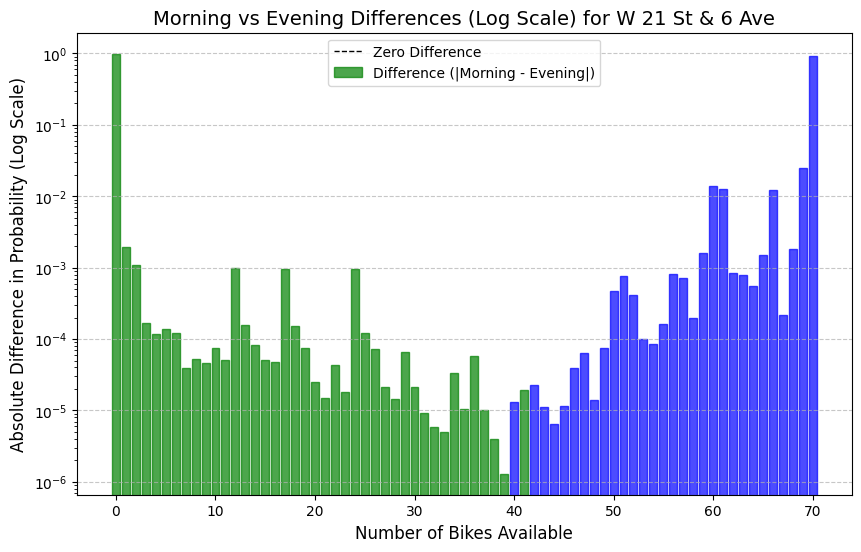

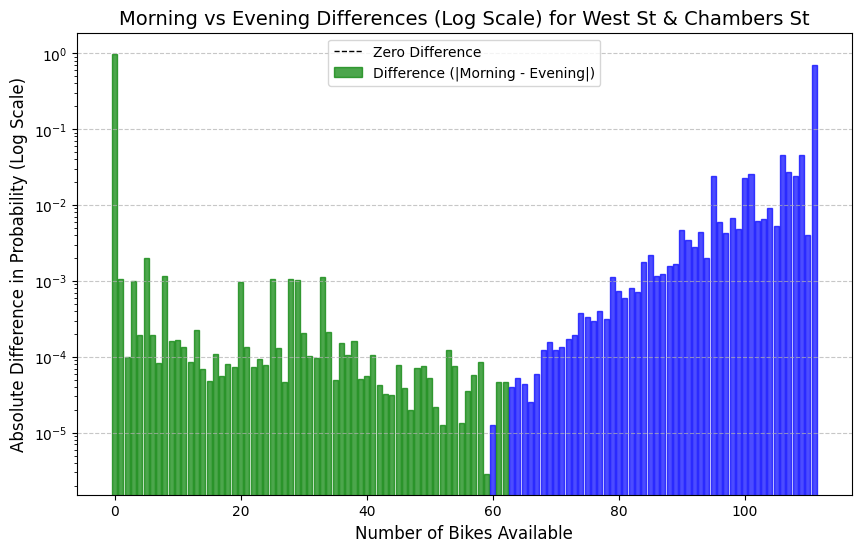

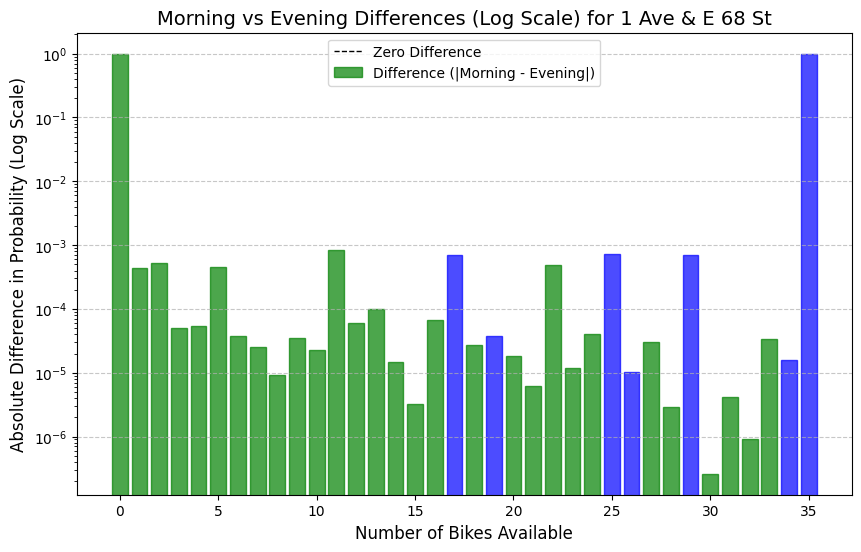

In [43]:
plot_difference_between_blocks(morning_steady_states, evening_steady_states, station_capacities)

#### Morning vs Evening Differences (Log Scale)

##### What the Graph Shows
- **Purpose**: The graph compares the steady-state probabilities of bike availability for each station during the **morning** and **evening** time blocks.
- **Colors**:
  - **Blue Bars**: Represent states where the probability is higher in the **morning** compared to the evening.
  - **Green Bars**: Represent states where the probability is higher in the **evening** compared to the morning.
- **Why This Matters**: These differences highlight patterns of inflow and outflow at each station, helping identify redistribution needs and potential bottlenecks.

---

##### W 21 St & 6 Ave
- **Morning**: Bikes flow in, filling the station (blue bars dominate higher states like 70).
- **Evening**: Bikes flow out, leaving the station empty (green bar dominates state 0).

##### West St & Chambers St
- **Morning**: Significant inflow of bikes, often filling the station (blue bars dominate higher states like 111).
- **Evening**: Gradual depletion of bikes, with the station often empty (green bar at state 0).

##### 1 Ave & E 68 St
- **Morning**: Rapid inflow of bikes fills the station (blue bars at higher states like 35).
- **Evening**: Significant outflow leads to frequent empty states (green bar at state 0).